In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster.bicluster import SpectralCoclustering

In [14]:
%matplotlib inline

In [5]:
whisky = pd.read_csv('whiskies.txt')
#can directly add data from csv to existing dataframe
whisky['Region'] = pd.read_csv('regions.txt')

In [6]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [7]:
whisky.tail()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands


In [8]:
#iloc to view just certain rows
whisky.iloc[0:10]

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,Islands
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,Speyside
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,Speyside
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,Highlands


In [9]:
#iloc to view just certain rows/cols
whisky.iloc[0:10, 0:5]

,RowID,Distillery,Body,Sweetness,Smoky
0,1,Aberfeldy,2,2,2
1,2,Aberlour,3,3,1
2,3,AnCnoc,1,3,2
3,4,Ardbeg,4,1,4
4,5,Ardmore,2,2,2
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


In [10]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')

In [11]:
#extract just the flavor data
flavors = whisky.iloc[:,2:14]
flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
5,2,3,1,1,0,1,1,1,0,1,1,2
6,0,2,0,0,0,1,1,0,2,2,3,3
7,2,3,1,0,0,2,1,2,2,2,2,1
8,2,2,1,0,0,1,0,0,2,2,2,2
9,2,3,2,1,0,0,2,0,2,1,2,1


In [12]:
corr_flavors = pd.DataFrame.corr(flavors)
print(corr_flavors)

               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

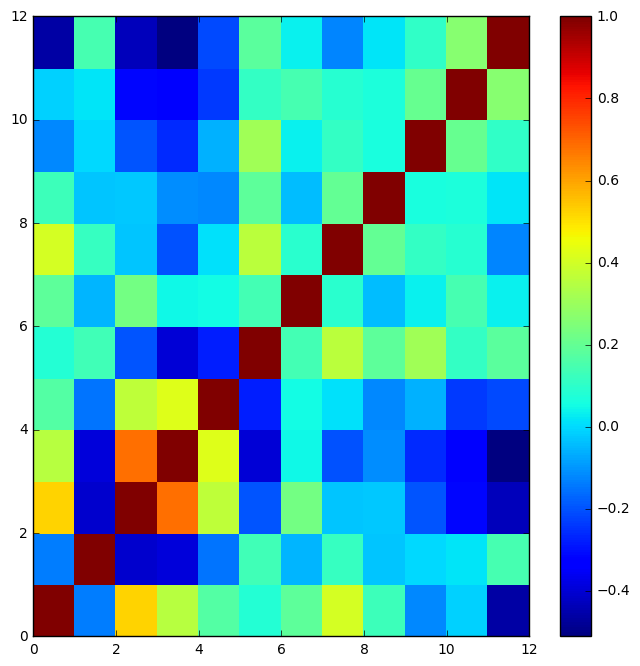

In [16]:
plt.figure(figsize=(8,8))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.show()

In [20]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
print(corr_whisky)

          0         1         2         3         4             5   \
0   1.000000  0.708632  0.697354 -0.147311  0.731902  3.890863e-01   
1   0.708632  1.000000  0.503074 -0.228591  0.511834  4.009832e-01   
2   0.697354  0.503074  1.000000 -0.140435  0.557020  3.896275e-01   
3  -0.147311 -0.228591 -0.140435  1.000000  0.231617  1.231300e-01   
4   0.731902  0.511834  0.557020  0.231617  1.000000  2.862513e-01   
5   0.389086  0.400983  0.389627  0.123130  0.286251  1.000000e+00   
6   0.464312  0.460830  0.730465 -0.430674  0.286065  2.433196e-01   
7   0.823842  0.793052  0.647298 -0.216957  0.679366  4.815434e-01   
8   0.713395  0.510144  0.846651 -0.009969  0.691939  4.259217e-01   
9   0.310460  0.242821  0.502091  0.436534  0.485363  4.791864e-01   
10  0.654848  0.396526  0.244535 -0.010331  0.377426  4.414148e-01   
11  0.580019  0.857816  0.394962 -0.025788  0.376845  6.010025e-01   
12  0.628808  0.662652  0.518328  0.307534  0.650444  4.400862e-01   
13  0.498571  0.7576

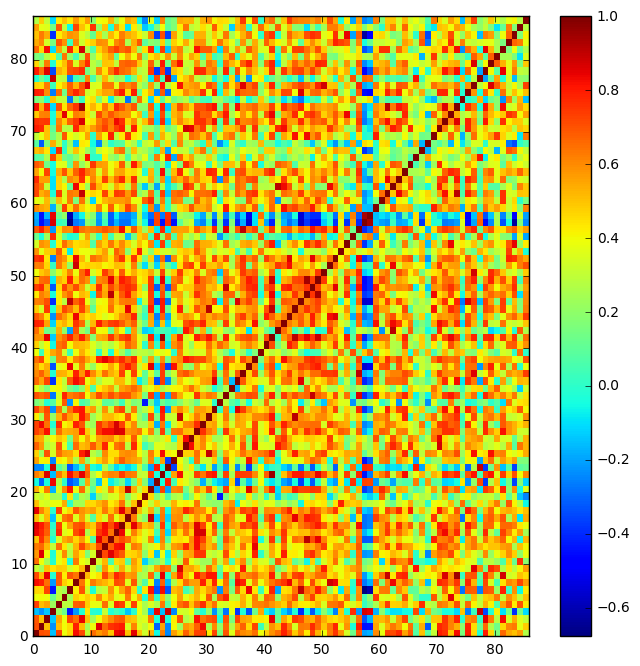

In [24]:
plt.figure(figsize=(8,8))
plt.pcolor(corr_whisky)
plt.colorbar()
plt.axis('tight')
plt.show()

In [25]:
whisky.Region.unique()

array(['Highlands', 'Speyside', 'Islay', 'Islands', 'Lowlands',
       'Campbelltown'], dtype=object)

# Spectral co-clustering

In [28]:
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)

In [30]:
model.rows_

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

In [31]:
np.sum(model.rows_, axis=1)

array([20,  5, 19, 17,  6, 19])

In [32]:
np.sum(model.rows_, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
model.row_labels_

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4, 3,
       4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2, 2, 0,
       5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2, 1, 5, 1,
       0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0])

In [34]:
#add in the Grouping
whisky['Group'] = pd.Series(model.row_labels_, index=whisky.index)

In [35]:
#sort according to cluster
whisky = whisky.ix[np.argsort(model.row_labels_)]

In [36]:
#no longer need old index
whisky=whisky.reset_index(drop=True)

In [37]:
#redo correlations and convert to np.array
correlations=pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations = np.array(correlations)

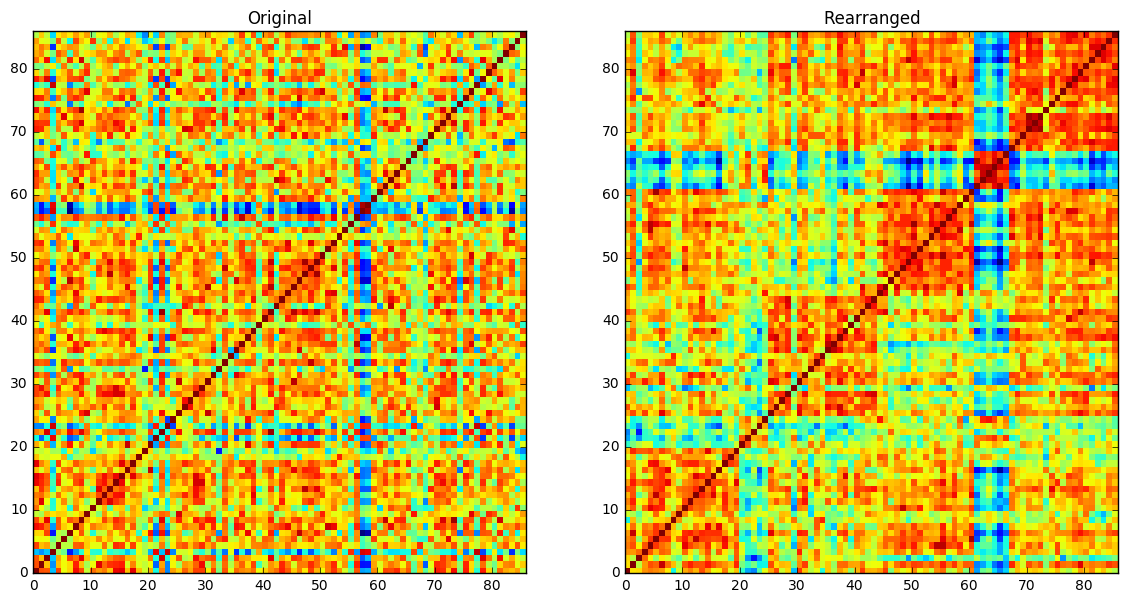

In [40]:
#display the updated heatmap
#clustered into 6 clusters which should now be similar in flavor profile
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis('tight')
plt.subplot(1,2,2)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis('tight')
plt.show()